<a href="https://colab.research.google.com/github/mariabandeira/Reconhecimento-de-Digitos/blob/main/MiniProjeto_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconhecimento de Dígitos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import warnings
from sklearn.preprocessing import MinMaxScaler
import pickle
warnings.filterwarnings('ignore')

test_redu_path = 'https://raw.githubusercontent.com/mariabandeira/Reconhecimento-de-Digitos/main/dataset_redu/test_redu.csv'
train_redu_path = 'https://raw.githubusercontent.com/mariabandeira/Reconhecimento-de-Digitos/main/dataset_redu/train_redu.csv'

train_redu = pd.read_csv(train_redu_path, sep=';')
test_redu = pd.read_csv(test_redu_path, sep=';')

# 3.3. Classificador de dígitos completo

In [2]:
# normalização para PLA e Regressão Logística
scaler = MinMaxScaler()

train_redu_scaled = scaler.fit_transform(train_redu.drop('label', axis=1)) # ajusta e transforma
test_redu_scaled = scaler.transform(test_redu.drop('label', axis=1)) # apenas transforma (faz com que não haja vazamento de dados)

train_redu['i_normalizada'] = train_redu_scaled[:,0]
train_redu['s_normalizada'] = train_redu_scaled[:,1]

test_redu['i_normalizada'] = test_redu_scaled[:,0]
test_redu['s_normalizada'] = test_redu_scaled[:,1]

In [3]:
X_train0_lin = train_redu[['intensidade', 'simetria']].values
y_train0_lin = np.array([1 if y_ == 0 else -1 for y_ in train_redu['label']])

X_test0_lin = test_redu[['intensidade', 'simetria']].values
y_test0_lin = np.array([1 if y_ == 0 else -1 for y_ in test_redu['label']])

## Regressão Linear

In [4]:
class LinearRegression:
  def __init__(self):
    self.w = None

  def fit(self, _X, _y):
    N = len(_X)

    X = np.column_stack((np.ones((N, 1)), _X))

    xtx = X.T @ X
    inv = np.linalg.inv(xtx) @ X.T
    self.w = inv @ _y

  def predict(self, _x):
    X = np.column_stack((np.ones((len(_x), 1)), _x))
    return [np.dot(self.w, xn) for xn in X]

  def getW(self):
    return self.w

In [5]:
class LRClassifier():
  def execute(self, _X, _y):
    lr = LinearRegression()
    lr.fit(_X, _y)
    self.w = lr.getW()

  def predict(self, X):
    N = len(X)
    X = np.column_stack((np.ones((N, 1)), X))
    return [np.sign(np.dot(self.w, xn)) for xn in X]

  def getRegressionY(self, regressionX, shift=0):
    return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]

In [6]:
classifier0 = LRClassifier()
classifier0.execute(X_train0_lin, y_train0_lin)
predictions = classifier0.predict(X_train0_lin)

In [7]:
lr0 = LinearRegression()
lr0.fit(X_train0_lin, y_train0_lin)
y_pred = np.array(lr0.predict(X_train0_lin))
w = lr0.getW()
print(w)

[-2.23739689  0.0254455  -0.0066963 ]


In [8]:
y_pred = np.where(y_pred >= 0, 1, -1)
y_pred

array([ 1, -1,  1, ..., -1, -1, -1])

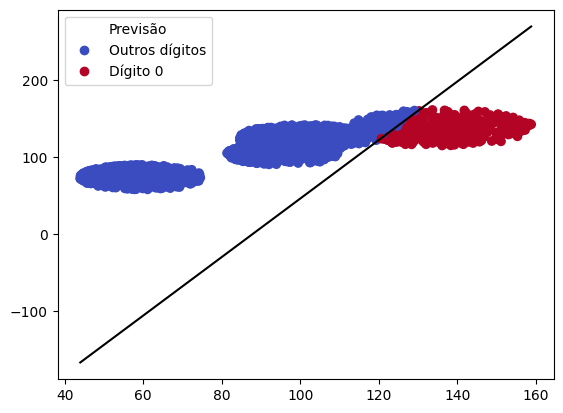

In [9]:
# Plotagem da Regressão Linear com LRClassifier
scatter = plt.scatter(X_train0_lin[:, 0], X_train0_lin[:, 1], c=y_pred, cmap='coolwarm')

x = np.linspace(X_train0_lin[:, 0].min(), X_train0_lin[:, 0].max(), 100)
y = classifier0.getRegressionY(x)

plt.plot(x, y, color='black')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Outros dígitos', 'Dígito 0'], title='Previsão')
plt.show()

In [10]:
print(f'valores -1: {y_pred.tolist().count(-1)}\nvalores 1: {y_pred.tolist().count(1)}')
print(f'total: {len(y_pred)}')

valores -1: 1864
valores 1: 322
total: 2186


In [11]:
# remover de train_redu os dados que não tem y_pred = -1
indices_to_keep = []
for i in range(len(train_redu)):
  if(y_pred[i] == -1):
    indices_to_keep.append(i)

train_redu_0 = train_redu.iloc[indices_to_keep]

len(train_redu_0)

1864

In [12]:
X_train1_lin = train_redu_0[['intensidade', 'simetria']].values
y_train1_lin = np.array([1 if y_ == 1 else -1 for y_ in train_redu_0['label']])

In [13]:
classifier1 = LRClassifier()
classifier1.execute(X_train1_lin, y_train1_lin)
predictions = classifier1.predict(X_train1_lin)

lr1 = LinearRegression()
lr1.fit(X_train1_lin, y_train1_lin)
y_pred1 = np.array(lr1.predict(X_train1_lin))
w = lr1.getW()
print(w)

[ 3.13153492 -0.03004819 -0.00898044]


In [14]:
y_pred1 = np.where(y_pred1 >= 0, 1, -1)
y_pred1

array([-1, -1, -1, ..., -1, -1, -1])

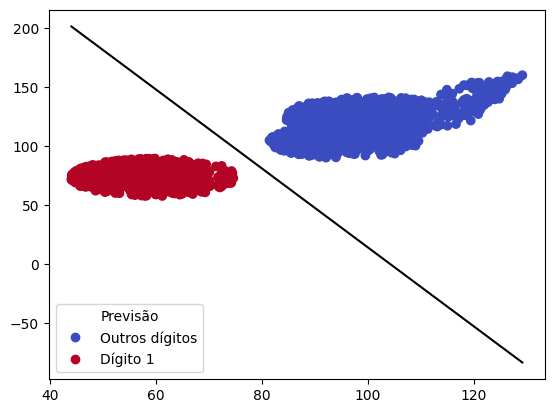

In [15]:
# Plotagem da Regressão Linear com LRClassifier
plt.scatter(X_train1_lin[:, 0], X_train1_lin[:, 1], c=y_pred1, cmap='coolwarm')

x = np.linspace(X_train1_lin[:, 0].min(), X_train1_lin[:, 0].max(), 100)
y = classifier1.getRegressionY(x)

plt.plot(x, y, color='black')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Outros dígitos', 'Dígito 1'], title='Previsão')
plt.show()

In [16]:
print(f'valores -1: {y_pred1.tolist().count(-1)}\nvalores 1: {y_pred1.tolist().count(1)}')
print(f'total: {len(y_pred1)}')

valores -1: 1256
valores 1: 608
total: 1864


In [17]:
# remover de train_redu os dados que não tem y_pred = -1
indices_to_keep = []
for i in range(len(train_redu_0)):
  if(y_pred1[i] == -1):
    indices_to_keep.append(i)

train_redu_1 = train_redu_0.iloc[indices_to_keep]

len(train_redu_1)

1256

In [18]:
X_train4_lin = train_redu_1[['intensidade', 'simetria']].values
y_train4_lin = np.array([1 if y_ == 4 else -1 for y_ in train_redu_1['label']])

In [19]:
classifier4 = LRClassifier()
classifier4.execute(X_train4_lin, y_train4_lin)
predictions = classifier4.predict(X_train4_lin)

lr4 = LinearRegression()
lr4.fit(X_train4_lin, y_train4_lin)
y_pred4 = np.array(lr4.predict(X_train4_lin))
w = lr4.getW()
print(w)

[ 6.07307683e+00  6.06019786e-03 -5.70824398e-02]


In [20]:
y_pred4 = np.where(y_pred4 >= 0, 1, -1)
y_pred4

array([-1, -1, -1, ..., -1, -1, -1])

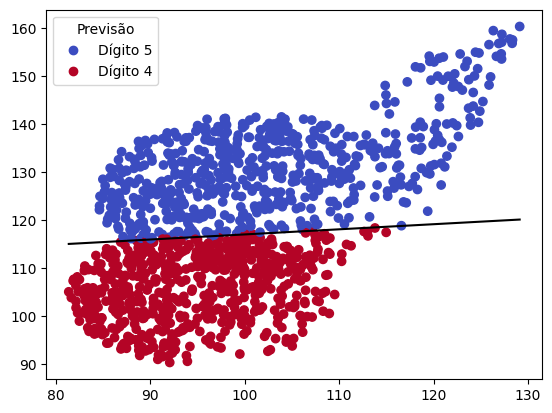

In [21]:
# Plotagem da Regressão Linear com LRClassifier
plt.scatter(X_train4_lin[:, 0], X_train4_lin[:, 1], c=y_pred4, cmap='coolwarm')

x = np.linspace(X_train4_lin[:, 0].min(), X_train4_lin[:, 0].max(), 100)
y = classifier4.getRegressionY(x)

plt.plot(x, y, color='black')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Dígito 5', 'Dígito 4'], title='Previsão')
plt.show()

In [22]:
def f0(x):
    pred = classifier0.predict(x)
    return np.array(pred)

def f1(x):
    pred = classifier1.predict(x)
    return np.array(pred)

def f4(x):
    pred = classifier4.predict(x)
    return np.array(pred)

def classificar_digito(x):
    if f0(x) == 1:
        return 0
    elif f1(x) == 1:
        return 1
    elif f4(x) == 1:
        return 4
    else:
        return 5
    

# classificando com os dados de treino para 
# calcular o Ein
classified_lin_train = []
for i in range(len(train_redu)):
  imagem_teste = train_redu.iloc[i][['intensidade', 'simetria']].values.reshape(1, -1)
  classified_lin_train.append(classificar_digito(imagem_teste))
print(classified_lin_train[:5])

with open('metrics_data/lin_train.pickle', 'wb') as f:
    pickle.dump(classified_lin_train, f)

# classificando com os dados de teste
# Eout
classified_lin_test = []
for i in range(len(test_redu)):
  imagem_teste = test_redu.iloc[i][['intensidade', 'simetria']].values.reshape(1, -1)
  classified_lin_test.append(classificar_digito(imagem_teste))
print(classified_lin_test[:5])

with open('metrics_data/lin_test.pickle', 'wb') as f:
    pickle.dump(classified_lin_test, f)


[0, 5, 0, 0, 0]
[0, 0, 0, 0, 0]


## Perceptron

In [23]:
class PocketPLA():
  def __init__(self):
    self.w = None

  def get_w(self):
    return self.w

  def set_w(self, w):
    self.w = w

  def execute(self, _X, y):
    X = np.array(_X)
    N = len(X)
    hasWrongClassifiedPoint = True
    bestError = len(y)

    self.w = np.zeros(len(X[0]))
    bestW = self.w
    for iter in range(N):

      #Testa se sign(wTXn) != Yn - ponto classificado errado
      for i in range(len(y)):
        if(np.sign(np.dot(self.w, X[i])) != y[i]):
          self.w = self.w + (y[i]*X[i])
          eIN = self.errorIN(X, y)
          if(bestError > eIN):
            bestError = eIN
            bestW = self.w
    self.w = bestW

  def getOriginalY(self, originalX):
    return (-self.w[0] - self.w[1]*originalX) / self.w[2]

  def h(self, x):
    return np.sign(np.dot(self.w, x))

  def errorIN(self, X, y):
    error = 0
    for i in range(len(y)):
      if(np.sign(np.dot(self.w, X[i])) != y[i]):
        error += 1

    return error

In [24]:
# utilizando os dados normalizados
X_train0_pla = np.hstack((np.ones((len(train_redu), 1)), train_redu[['i_normalizada', 's_normalizada']].values))
y_train0_pla = np.array([1 if y_ == 0 else -1 for y_ in train_redu['label']])

X_test0_pla = np.hstack((np.ones((len(test_redu), 1)), test_redu[['i_normalizada', 's_normalizada']].values))
y_test0_pla = np.array([1 if y_ == 0 else -1 for y_ in test_redu['label']])


# dados originais
X_train0_pla_rev = scaler.inverse_transform(train_redu[['i_normalizada', 's_normalizada']].values)
X_train0_pla_rev = np.hstack((np.ones((len(train_redu), 1)), X_train0_pla_rev))

X_test0_pla_rev = scaler.inverse_transform(test_redu[['i_normalizada', 's_normalizada']].values)
X_test0_pla_rev = np.hstack((np.ones((len(test_redu), 1)), X_test0_pla_rev))

In [25]:
pla0 = PocketPLA()
pla0.execute(X_train0_pla, y_train0_pla)

In [26]:
# Predição do Dígito com Pocket PLA
y_pla0 = []
for i in range(len(X_train0_pla)):
  y_pla0.append(pla0.h(X_train0_pla[i]))

In [27]:
xmin = X_train0_pla_rev[:,1].min()
xmax = X_train0_pla_rev[:,1].max()

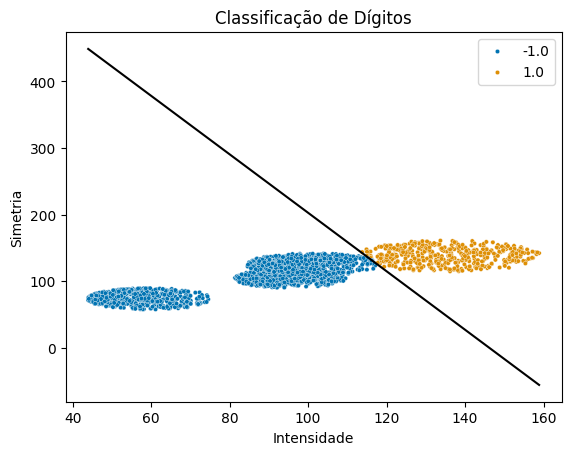

In [28]:
sns.scatterplot(x='intensidade', y='simetria', hue=y_pla0, data=train_redu, palette='colorblind', s=10)
#sns.scatterplot(x='intensidade', y='simetria', hue=train_redu['label'], data=train_redu, palette='colorblind', marker='x')

x = np.linspace(xmin, xmax, 100)

# necessário para obter os dados originais
x_normalized = scaler.transform(np.column_stack((x, np.zeros_like(x))))[:, 0]
y_normalized = pla0.getOriginalY(x_normalized)
y = scaler.inverse_transform(np.column_stack((x, y_normalized)))[:, 1]

#y = pla0.getOriginalY(x)
plt.plot(x, y, color='black')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Classificação de Dígitos')
plt.show()

In [29]:
def new_data(X, y_pred):
  indices_to_keep = []
  for i in range(len(X)):
    if(np.array(y_pred[i]) == -1):
      indices_to_keep.append(i)
  return X.iloc[indices_to_keep]

In [30]:
train_redu_0_pla = new_data(train_redu, y_pla0)
train_redu_0_pla

,label,intensidade,simetria,i_normalizada,s_normalizada
92,0,114.329412,130.901961,0.612446,0.708115
139,0,112.878431,137.670588,0.599816,0.773747
257,0,112.592157,135.717647,0.597324,0.754810
277,0,112.745098,135.662745,0.598655,0.754278
386,0,116.486275,128.917647,0.631221,0.688874
...,...,...,...,...,...
2181,5,105.686275,133.890196,0.537209,0.737090
2182,5,113.050980,116.698039,0.601318,0.570386
2183,5,110.725490,133.019608,0.581075,0.728649
2184,5,99.305882,132.133333,0.481669,0.720055


In [31]:
X_train1_pla = train_redu_0_pla[['i_normalizada', 's_normalizada']].values
y_train1_pla = np.array([1 if y_ == 1 else -1 for y_ in train_redu_0_pla['label']])

# adicionar o 1 para o bias
X_train1_pla = np.hstack((np.ones((len(X_train1_pla), 1)), X_train1_pla))

# dados originais
X_train1_pla_rev = scaler.inverse_transform(train_redu_0_pla[['i_normalizada', 's_normalizada']].values)
X_train1_pla_rev = np.hstack((np.ones((len(train_redu_0_pla), 1)), X_train1_pla_rev))

In [32]:
pla1 = PocketPLA()
pla1.execute(X_train1_pla, y_train1_pla)

In [33]:
y_pla1 = []
for i in range(len(X_train1_pla)):
  y_pla1.append(pla1.h(X_train1_pla[i]))

In [34]:
xmin = X_train1_pla_rev[:,1].min()
xmax = X_train1_pla_rev[:,1].max()

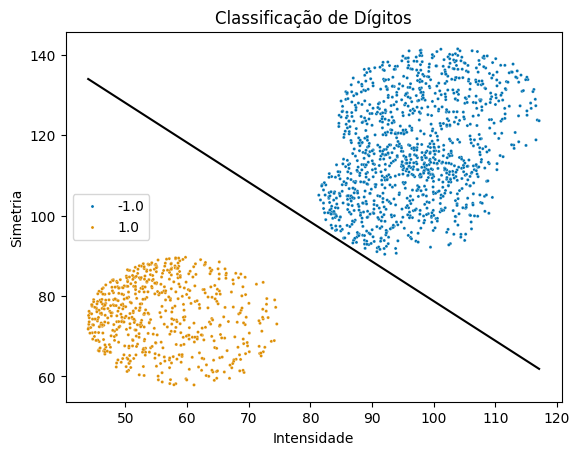

In [35]:
#sns.scatterplot(x='intensidade', y='simetria', hue=y_train1_pla, data=train_redu_0_pla, palette='colorblind', marker='x')
sns.scatterplot(x='intensidade', y='simetria', hue=y_pla1, data=train_redu_0_pla, palette='colorblind', s=5)

x = np.linspace(xmin, xmax, 100)

# necessário para obter os dados originais
x_normalized = scaler.transform(np.column_stack((x, np.zeros_like(x))))[:, 0]
y_normalized = pla1.getOriginalY(x_normalized)
y = scaler.inverse_transform(np.column_stack((x, y_normalized)))[:, 1]

#y = pla1.getOriginalY(x)
plt.plot(x, y, color='black')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Classificação de Dígitos')
plt.show()

In [36]:
train_redu_1_pla = new_data(train_redu_0_pla, y_pla1)

In [37]:
X_train4_pla = train_redu_1_pla[['i_normalizada', 's_normalizada']].values
y_train4_pla = np.array([1 if y_ == 4 else -1 for y_ in train_redu_1_pla['label']])

# adicionar o 1 para o bias
X_train4_pla = np.hstack((np.ones((len(X_train4_pla), 1)), X_train4_pla))

# dados originais
X_train4_pla_rev = scaler.inverse_transform(train_redu_1_pla[['i_normalizada', 's_normalizada']].values)
X_train4_pla_rev = np.hstack((np.ones((len(train_redu_1_pla), 1)), X_train4_pla_rev))

In [38]:
pla4 = PocketPLA()
pla4.execute(X_train4_pla, y_train4_pla)

In [39]:
y_pla4 = []
for i in range(len(X_train4_pla)):
  y_pla4.append(pla4.h(X_train4_pla[i]))

In [40]:
xmin = X_train4_pla_rev[:,1].min()
xmax = X_train4_pla_rev[:,1].max()

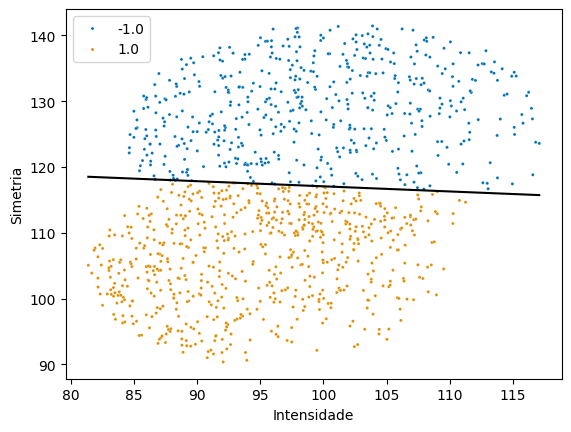

In [41]:
#sns.scatterplot(x='intensidade', y='simetria', hue=y_train4_pla, data=train_redu_1_pla, palette='colorblind', marker='x')
sns.scatterplot(x='intensidade', y='simetria', hue=y_pla4, data=train_redu_1_pla, palette='colorblind', s=5)

x = np.linspace(xmin, xmax, 100)

# necessário para obter os dados originais
x_normalized = scaler.transform(np.column_stack((x, np.zeros_like(x))))[:, 0]
y_normalized = pla4.getOriginalY(x_normalized)
y = scaler.inverse_transform(np.column_stack((x, y_normalized)))[:, 1]

#y = pla4.getOriginalY(x)
plt.plot(x, y, color='black')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.show()

In [42]:
def f0(x):
    pred = pla0.h(x)
    return np.array(pred)

def f1(x):
    pred = pla1.h(x)
    return np.array(pred)

def f4(x):
    pred = pla4.h(x)
    return np.array(pred)

def classificar_digito(x):
    if f0(x) == 1:
        return 0
    elif f1(x) == 1:
        return 1
    elif f4(x) == 1:
        return 4
    else:
        return 5
    

# classificando com os dados de treino
# Ein
classified_pla_train = []
for i in range(len(X_train0_pla)):
  imagem_teste = X_train0_pla[i]
  classified_pla_train.append(classificar_digito(imagem_teste))
print(classified_pla_train[:5])

with open('metrics_data/pla_train.pickle', 'wb') as f:
    pickle.dump(classified_pla_train, f)

# classificando com os dados de teste
# Eout
classified_pla_test = []
for i in range(len(X_test0_pla)):
  imagem_teste = X_test0_pla[i]
  classified_pla_test.append(classificar_digito(imagem_teste))
print(classified_pla_test[:5])

with open('metrics_data/pla_test.pickle', 'wb') as f:
    pickle.dump(classified_pla_test, f)

[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]


## Regressão Logística

In [70]:
import numpy as np
from numpy import linalg as LA
import random
from random import sample

class LogisticRegression_:
  def __init__(self, eta=0.1, tmax=1000, bs=20):
    self.eta = eta
    self.tmax = tmax
    self.batch_size = bs

  # Infere o vetor w da funçao hipotese
  #Executa a minimizao do erro de entropia cruzada pelo algoritmo gradiente de descida
  def fit(self, _X, _y):
    X = np.array(_X)
    y = np.array(_y)

    N = X.shape[0]
    d = X.shape[1]
    w = np.zeros(d, dtype=float)
    self.w = []

    for t in range(self.tmax):
        vsoma = np.zeros(d, dtype=float)
      
        # Seleciona um lote de dados aleatorios
        if self.batch_size < N:
            idx = random.sample(range(N), self.batch_size)
            batchX = [X[i] for i in idx]
            batchY = [y[i] for i in idx]
        else:
            batchX = X
            batchY = y

        # Calcula o gradiente da funcao de erro
        for xn, yn in zip(batchX, batchY):
            vsoma += (yn * xn) / (1 + np.exp((yn * w).T @ xn))

        grad_t = vsoma / len(batchY)
        # condição de parada
        if LA.norm(grad_t) < 0.0001:
            break

        w = w + (self.eta * grad_t)

    self.w = w

  #funcao hipotese inferida pela regressa logistica
  def predict_prob(self, X):
    s = np.dot(X, self.w)
    prob = np.exp(s) / (1 + np.exp(s))
    return prob

  #Predicao por classificação linear
  def predict(self, X):
    prob = self.predict_prob(X)
    y = np.where(prob >= 0.5, 1, -1)
    return y

  def getW(self):
    return self.w

  def getRegressionY(self, regressionX, shift=0):
    return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]

In [71]:
# utilizando os dados normalizados
X_train0_log = np.hstack((np.ones((len(train_redu), 1)), train_redu[['i_normalizada', 's_normalizada']].values))
y_train0_log = np.array([1 if y_ == 0 else -1 for y_ in train_redu['label']])

X_test0_log = np.hstack((np.ones((len(test_redu), 1)), test_redu[['i_normalizada', 's_normalizada']].values))
y_test0_log = np.array([1 if y_ == 0 else -1 for y_ in test_redu['label']])


# dados originais
X_train0_log_rev = scaler.inverse_transform(train_redu[['i_normalizada', 's_normalizada']].values)
X_train0_log_rev = np.hstack((np.ones((len(train_redu), 1)), X_train0_log_rev))

X_test0_log_rev = scaler.inverse_transform(test_redu[['i_normalizada', 's_normalizada']].values)
X_test0_log_rev = np.hstack((np.ones((len(test_redu), 1)), X_test0_log_rev))

In [72]:
LR0 = LogisticRegression_(0.1, 1000)

LR0.fit(X_train0_log, y_train0_log)

pred_log0 = LR0.predict(X_train0_log)

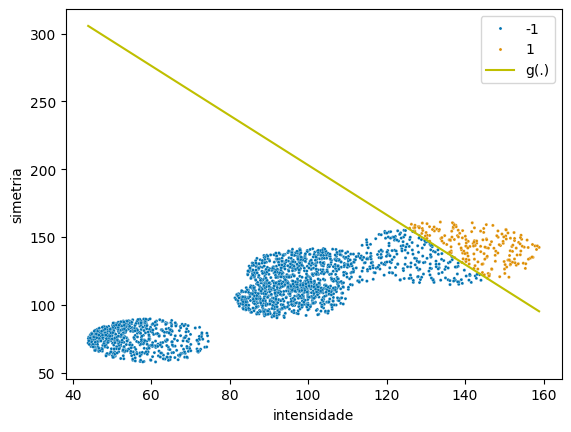

In [73]:
# plotagem
xmin = X_train0_log_rev[:,1].min()
xmax = X_train0_log_rev[:,1].max()

#sns.scatterplot(x='intensidade', y='simetria', hue=y_train0_log, data=train_redu, palette='colorblind', marker='x')
sns.scatterplot(x='intensidade', y='simetria', hue=LR0.predict(X_train0_log), data=train_redu, palette='colorblind', s=5)

x = np.linspace(xmin, xmax, 100)
x_normalized = scaler.transform(np.column_stack((x, np.zeros_like(x))))[:, 0]
y_normalized = LR0.getRegressionY(x_normalized)
y = scaler.inverse_transform(np.column_stack((x, y_normalized)))[:, 1]

#y = LR0.getRegressionY(x)
plt.plot(x, y, 'y-', label='g(.)')
plt.legend(loc='upper right')
plt.show()

In [74]:
train_redu_0_log = new_data(train_redu, pred_log0)

In [75]:
X_train1_log = train_redu_0_log[['i_normalizada', 's_normalizada']].values
X_train1_log = np.hstack((np.ones((len(X_train1_log), 1)), X_train1_log))
   
y_train1_log = np.array([1 if y_ == 1 else -1 for y_ in train_redu_0_log['label']])

# dados originais
X_train1_log_rev = scaler.inverse_transform(train_redu_0_log[['i_normalizada', 's_normalizada']].values)
X_train1_log_rev = np.hstack((np.ones((len(train_redu_0_log), 1)), X_train1_log_rev))

In [76]:
LR1 = LogisticRegression_(0.1, 1000)
LR1.fit(X_train1_log, y_train1_log)
pred_log1 = LR1.predict(X_train1_log)
pred_log1[:5]

array([-1, -1, -1, -1, -1])

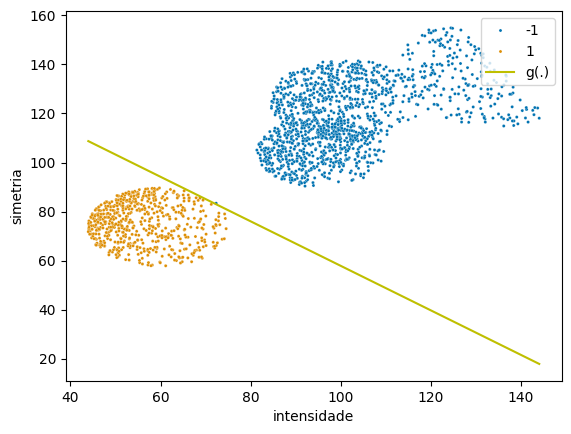

In [77]:
# dados originais
xmin = X_train1_log_rev[:,1].min()
xmax = X_train1_log_rev[:,1].max()

#sns.scatterplot(x='intensidade', y='simetria', hue=y_train1_log, data=train_redu_0_log, palette='colorblind', marker='x')
sns.scatterplot(x='intensidade', y='simetria', hue=pred_log1, data=train_redu_0_log, palette='colorblind', s=5)

x = np.linspace(xmin, xmax, 100)
x_normalized = scaler.transform(np.column_stack((x, np.zeros_like(x))))[:, 0]
y_normalized = LR1.getRegressionY(x_normalized)
y = scaler.inverse_transform(np.column_stack((x, y_normalized)))[:, 1]

#y = LR1.getRegressionY(x)
plt.plot(x, y, 'y-', label='g(.)')
plt.legend(loc='upper right')
plt.show()

In [78]:
train_redu_1_log = new_data(train_redu_0_log, pred_log1)

In [79]:
X_train4_log = train_redu_1_log[['i_normalizada', 's_normalizada']].values
X_train4_log = np.hstack((np.ones((len(X_train4_log), 1)), X_train4_log))

y_train4_log = np.array([1 if y_ == 4 else -1 for y_ in train_redu_1_log['label']])

# dados originais
X_train4_log_rev = scaler.inverse_transform(train_redu_1_log[['i_normalizada', 's_normalizada']].values)
X_train4_log_rev = np.hstack((np.ones((len(train_redu_1_log), 1)), X_train4_log_rev))

In [80]:
LR4 = LogisticRegression_(0.1, 1000)
LR4.fit(X_train4_log, y_train4_log)
pred_log4 = LR4.predict(X_train4_log)

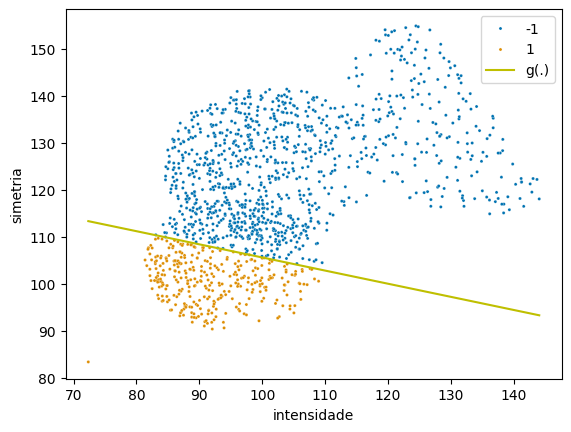

In [81]:
xmin = X_train4_log_rev[:,1].min()
xmax = X_train4_log_rev[:,1].max()

#sns.scatterplot(x='intensidade', y='simetria', hue=y_train4_log, data=train_redu_1_log, palette='colorblind', marker='x')
sns.scatterplot(x='intensidade', y='simetria', hue=pred_log4, data=train_redu_1_log, palette='colorblind', s=5)

x = np.linspace(xmin, xmax, 100)
x_normalized = scaler.transform(np.column_stack((x, np.zeros_like(x))))[:, 0]
y_normalized = LR4.getRegressionY(x_normalized)
y = scaler.inverse_transform(np.column_stack((x, y_normalized)))[:, 1]

#y = LR4.getRegressionY(x)
plt.plot(x, y, 'y-', label='g(.)')
plt.legend(loc='upper right')
plt.show()

In [83]:
def f0(x):
    pred = LR0.predict(x)
    return np.array(pred)

def f1(x):
    pred = LR1.predict(x)
    return np.array(pred)

def f4(x):
    pred = LR4.predict(x)
    return np.array(pred)

def classificar_digito(x):
    if f0(x) == 1:
        return 0
    elif f1(x) == 1:
        return 1
    elif f4(x) == 1:
        return 4
    else:
        return 5
    
# classificando com os dados de treino
# Ein
classified_log_train = []
for i in range(len(X_train0_log)):
  imagem_teste = X_train0_log[i]
  classified_log_train.append(classificar_digito(imagem_teste))
print(classified_log_train[:5])

with open('metrics_data/log_train.pickle', 'wb') as f:
    pickle.dump(classified_log_train, f)

# classificando com os dados de teste
# Eout
classified_log_test = []
for i in range(len(X_test0_log)):
  imagem_teste = X_test0_log[i]
  classified_log_test.append(classificar_digito(imagem_teste))
print(classified_log_test[:5])

with open('metrics_data/log_test.pickle', 'wb') as f:
    pickle.dump(classified_log_test, f)

[0, 5, 5, 0, 0]
[0, 5, 0, 0, 5]
